In [1]:
from numpy import int64
import numpy as np
import pandas as pd
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#pip install Keras

In [3]:
#pip install tensorflow

In [4]:
df = read_csv("DAX_2.csv",encoding='cp1252')

In [5]:
phy_info=df[["id_physician","physician_company", "specialization"]].drop_duplicates()

In [6]:
# Group the data frame by AppointmentType and extract a number of stats from each group
df=df.groupby(
   ['id_physician','EncounterDate']
).agg(
    {
         'Encounters':'first',    # get the first Encounter per group
         'Medialength':'first' ,  # get the first Medialength per group
         'Appointments': "sum"  # get the sum of Appointments per group
    }
).reset_index()

In [7]:
df2=df.merge(phy_info, on ="id_physician") 
df2["Medialength"].describe()

count    8.794300e+04
mean     7.791646e+06
std      7.140793e+06
min      0.000000e+00
25%      2.227000e+06
50%      6.240000e+06
75%      1.170700e+07
max      2.645850e+08
Name: Medialength, dtype: float64

In [8]:
phy_sample=df2["id_physician"].drop_duplicates()
# .sample(n=100)

In [9]:
df2=df2.merge(phy_sample,on = "id_physician",validate="m:1")

In [10]:
df2.shape

(87943, 7)

C:\Users\sindhumati.panigrahi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Encounters', ylabel='Density'>

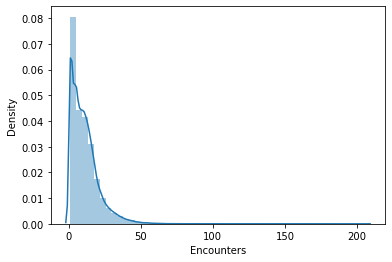

In [11]:
sns.distplot(df['Encounters'])

C:\Users\sindhumati.panigrahi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Encounters', ylabel='Density'>

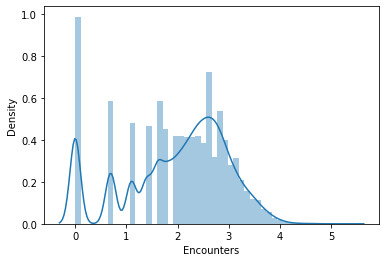

In [12]:
sns.distplot(np.log(df['Encounters']))

<AxesSubplot:>

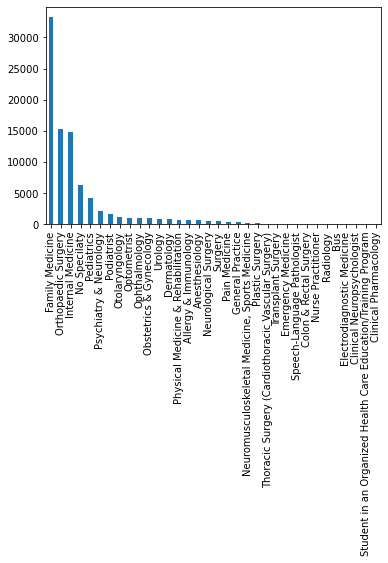

In [13]:
df2['specialization'].value_counts().plot(kind='bar')

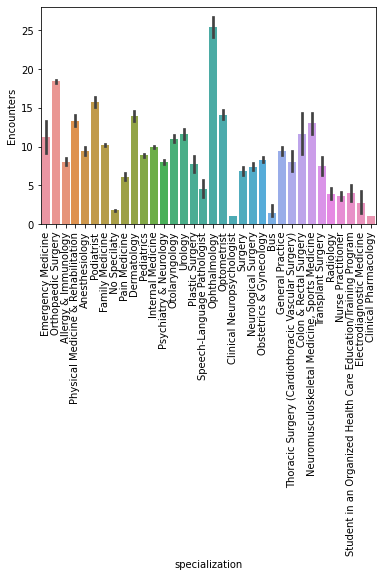

In [14]:
from matplotlib import pyplot as plt
sns.barplot(x=df2['specialization'],y=df2['Encounters'])
plt.xticks(rotation='vertical')
plt.show()

In [15]:
df2.corr()

,id_physician,Encounters,Medialength,Appointments
id_physician,1.000000,-0.382055,-0.078524,0.094645
Encounters,-0.382055,1.000000,0.547463,0.357454
Medialength,-0.078524,0.547463,1.000000,0.276949
Appointments,0.094645,0.357454,0.276949,1.000000


In [16]:
df2.describe()

,id_physician,Encounters,Medialength,Appointments
count,87943.000000,87943.000000,8.794300e+04,87943.000000
mean,57534.485417,11.184995,7.791646e+06,9.857271
std,12317.830462,9.576811,7.140793e+06,9.996043
min,155.000000,1.000000,0.000000e+00,0.000000
25%,55811.000000,4.000000,2.227000e+06,0.000000
50%,59579.000000,9.000000,6.240000e+06,9.000000
75%,64450.000000,15.000000,1.170700e+07,16.000000
max,73147.000000,206.000000,2.645850e+08,123.000000


In [17]:
df2.isna().sum()

id_physician         0
EncounterDate        0
Encounters           0
Medialength          0
Appointments         0
physician_company    0
specialization       0
dtype: int64

In [18]:
df2.dtypes

id_physician          int64
EncounterDate        object
Encounters            int64
Medialength           int64
Appointments          int64
physician_company    object
specialization       object
dtype: object

## Convert Object into int datatype

## Working with Date Features

In [19]:
# Converting to datetime datatype
df2['EncounterDate'] = pd.to_datetime(df2['EncounterDate'])

In [20]:
df2['EncounterDate_year'] = df2['EncounterDate'].dt.year 
df2["EncounterDate_Month_Number"] = df2["EncounterDate"].dt.month
# df2['EncounterDate_day'] = df2["EncounterDate"].dt.day
df2["EncounterDate_Week_Day"] = df2["EncounterDate"].dt.dayofweek
df2['EncounterDate_dayofyear'] = df2["EncounterDate"].dt.dayofyear
df2['EncounterDate_weekend'] = df2['EncounterDate'].dt.dayofweek >=5
df2['EncounterDate_week']=df2['EncounterDate'].dt.weekday
#df2=df2.drop(['EncounterDate'], axis=1)

#Monday is 0 and sunday is 6

In [21]:
import numpy as np

df2["EncounterDate_weekend"]= np.asarray(df2["EncounterDate_weekend"]).astype(np.float32)

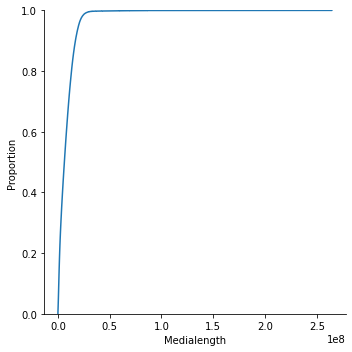

In [22]:
sns.displot(df2['Medialength'], kind= 'ecdf')

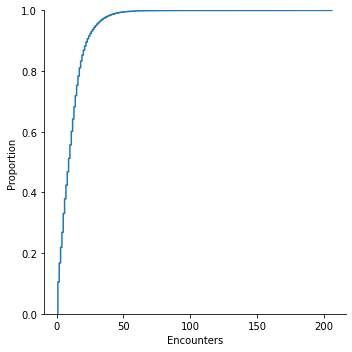

In [23]:
sns.displot(df2['Encounters'], kind= 'ecdf')

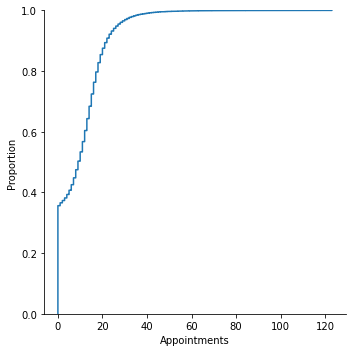

In [24]:
sns.displot(df2['Appointments'], kind= 'ecdf')

(0.0, 20.0)

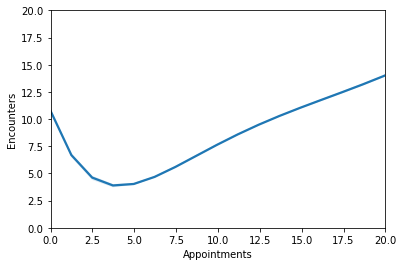

In [25]:
ax=sns.regplot(data=df2,x='Appointments', y='Encounters',order=10,scatter=False)
ax.set_xlim(0,20)
ax.set_ylim(0,20)

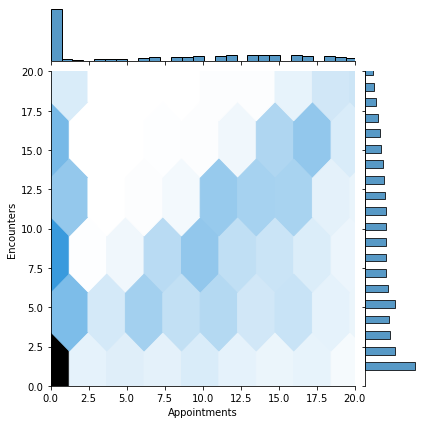

In [26]:
bx=sns.jointplot(data=df2,x='Appointments', y='Encounters',kind='hex',xlim=(0,20),ylim=(0,20))

In [27]:
def unique_col_values(df2):
    for column in df2:
        if df2[column].dtypes=='object':
            print(f'{column}: {df2[column].unique()}')
# To check the unique values in dataset           
# df2.apply(lambda x:len(x.unique()))

In [28]:
unique_col_values(df2)

physician_company: ['Nuance Research' 'EmergeOrtho - Triangle'
 'Midlands Orthopaedics and Neurosurgery'
 'PRISMA Health - Midlands, Orthopaedics' 'OrthoCarolina'
 'Signature Orthopedics - South County' 'Duke University, Orthopaedics'
 'South Carolina Sports Medicine and Orthopaedic Center'
 'Appalachian Regional HC System (ARHCS)' 'EyeScribes'
 'Signature Orthopedics – St. Charles' 'OrthoIndy'
 'EmergeOrtho - Wilmington' 'EmergeOrtho - Blue Ridge'
 'Raleigh Hand Center' 'Spectrum Medical' 'Twin Cities Orthopedics'
 'OrthoSC' 'Central Carolina Orthopaedic Associates' 'Carrell Clinic'
 'Great Lakes Orthopedics and Sports Medicine' 'Associated Hand Surgeons'
 'Midwest Orthopaedics at Rush' 'New York Spine & Wellness Center'
 'Northside Hospital' 'Augusta University, Orthopaedics'
 'PRISMA Health - Upstate, Orthopedic Trauma'
 'Syracuse Orthopaedic Specialists'
 'PRISMA Health - Upstate, Pediatric Orthopaedics' 'OrthoNebraska'
 'PRISMA Health - Upstate, The Hand Center' 'Resurgens Orthopa

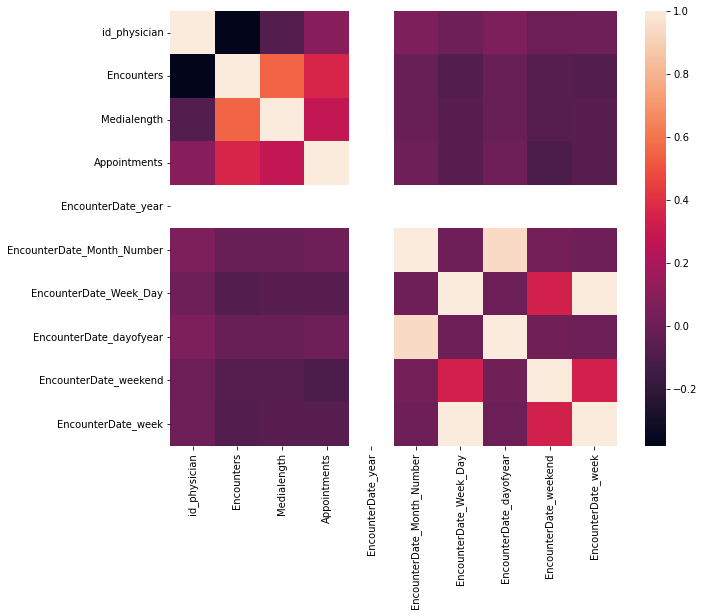

In [29]:
import matplotlib.pyplot as plt
df2_corr=df2.corr().round(2)
plt.figure(figsize=(10,8))
plot=sns.heatmap(df2.corr().round(2))

In [30]:
df2.corr()['Encounters']

id_physician                 -0.382055
Encounters                    1.000000
Medialength                   0.547463
Appointments                  0.357454
EncounterDate_year                 NaN
EncounterDate_Month_Number   -0.010638
EncounterDate_Week_Day       -0.075184
EncounterDate_dayofyear      -0.008198
EncounterDate_weekend        -0.074246
EncounterDate_week           -0.075184
Name: Encounters, dtype: float64

In [31]:
df2=pd.get_dummies(data=df2, columns= ['physician_company','specialization'])

In [32]:
# scale_columns= ['Appointments','Encounters','Medialength']
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# df2[scale_columns]= scaler.fit_transform(df2[scale_columns])
# print(df2)

In [33]:
df2.query('Appointments>0').shape
#df2.shape

(56603, 285)

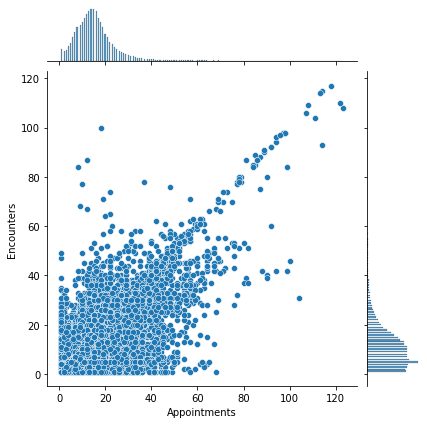

In [34]:
plot=sns.jointplot(data=df2.query('Appointments>0'),x="Appointments",y="Encounters")

In [35]:
df2["Medialength"]=df2["Medialength"].astype(int)
df2["Appointments"]=(df2["Appointments"]).astype(int)
df2['Medialength'].describe()

count    8.794300e+04
mean     7.791646e+06
std      7.140793e+06
min      0.000000e+00
25%      2.227000e+06
50%      6.240000e+06
75%      1.170700e+07
max      2.645850e+08
Name: Medialength, dtype: float64

In [36]:
import datetime
train=df2[pd.to_datetime(df2["EncounterDate"]).dt.date<datetime.date(2022,10,22)]
test=df2[pd.to_datetime(df2["EncounterDate"]).dt.date>=datetime.date(2022,10,22)]

In [37]:
# def Stacked_History(Hist,Schedule,Day):
#     # Extraction of last 28days data and scheduled infromation for next 7 days 
#     #and stack encounter in one DataFrame
#     #Extraction of last 28 days actual
    
#     Day_M28=Day-datetime.timedelta(days=28)
#     Extracted_History=Hist[["id_physician","Encounters","Medialength","Appointments",
#                 "EncounterDate"]].query("(EncounterDate>@Day_M28) and (EncounterDate<@Day)").copy()
#     Extracted_History['Days_previous']= np.datetime64(Day)-Extracted_History["EncounterDate"]
#     Rowlist=[]
    
#     #Extraction of last 28 days(history) +7 days(Future) Schedules 
#     Day_plus7=Day+datetime.timedelta(days=7)
#     Extracted_Schedule=Schedule.query("(EncounterDate>@Day_M28) and (EncounterDate<@Day_plus7)").copy()
#     Extracted_Schedule['Days_previous']= np.datetime64(Day)-Extracted_Schedule["EncounterDate"]
#     #Stack the encounters in one DataFrame
#     for id_physician_ in Extracted_History["id_physician"].drop_duplicates(): 
#         By_physician_hist=Extracted_History.query("id_physician==@id_physician_")
#         By_physician_hist=By_physician_hist.drop_duplicates()
#         if sum(By_physician_hist.duplicated(subset="Days_previous"))!=0:
#             print("By_physician_hist", By_physician_hist)
#         assert sum(By_physician_hist.duplicated(subset="Days_previous"))==0
#     # Created by Physician Schedule
#         By_physician_sche=Extracted_Schedule.query("id_physician==@id_physician_")  
#         By_physician_sche=By_physician_sche.drop_duplicates()
#         assert sum(By_physician_sche.duplicated(subset="Days_previous"))==0
#     # Predict encounter for next 7 days
# #         Row=pd.wide_to_long(By_physician_hist,stubnames="w",j="Encounters",i="Days_previous",sep=".")
# #         print(By_physician_hist.columns)
# #         print(Row) 
# #         stop
#         Row_Hist=pd.pivot(By_physician_hist,columns="Days_previous",index="id_physician",
#                      values=['Encounters', 'Medialength'])
#     # Pivoting on Physician Schedule
#         Row_Sche=pd.pivot(By_physician_sche,columns="Days_previous",index="id_physician",
#                      values=['Appointments'])
#         Row=pd.concat([Row_Hist,Row_Sche],axis=1)
        
#         Rowlist.append(Row)
#     Out=pd.concat(Rowlist)
#     return Out

In [38]:
def Stacked_History_Prediction(Hist,Schedule,Day,No_history_days=28,No_prediction_days=8):
#Extraction of last 28days data and scheduled infromation for next 7 days 
#and stack encounter in one DataFrame
#Extraction of last 28 days actual
    
    Day_M28=Day-datetime.timedelta(days=No_history_days)
    Extracted_History=Hist[["id_physician","Encounters","Medialength","Appointments",
        "EncounterDate"]].query("(EncounterDate>@Day_M28) and (EncounterDate<@Day)").copy()
    Extracted_History['Days_previous']= (np.datetime64(Day)-Extracted_History["EncounterDate"]).dt.days
    Rowlist=[]
    
    Day_P7=Day+datetime.timedelta(days=No_prediction_days)
    Extracted_Prediction=Hist[["id_physician","Encounters","Medialength","Appointments",
        "EncounterDate"]].query("(EncounterDate<@Day_P7) and (EncounterDate>@Day)").copy()
    Extracted_Prediction['Days_previous']= (np.datetime64(Day)-Extracted_Prediction["EncounterDate"]).dt.days
    
    
    #Extraction of last 28 days(history) +7 days(Future) Schedules 
    Day_plus7=Day+datetime.timedelta(days=No_prediction_days)
    Extracted_Schedule=Schedule.query("(EncounterDate>@Day_M28) and (EncounterDate<@Day_plus7)")\
    [["Appointments","EncounterDate","id_physician"]].copy()
    
    Extracted_Schedule['Days_previous']= (np.datetime64(Day)-Extracted_Schedule["EncounterDate"]).dt.days
    #Stack the encounters in one DataFrame
    for id_physician_ in Extracted_History["id_physician"].drop_duplicates(): 
        By_physician_hist=Extracted_History.query("id_physician==@id_physician_")
        By_physician_hist=By_physician_hist.drop_duplicates() #keep=last
        
        if sum(By_physician_hist.duplicated(subset="Days_previous"))!=0:
            print("By_physician_hist", By_physician_hist)
        assert sum(By_physician_hist.duplicated(subset="Days_previous"))==0
    #Created by Physician Schedule
    
        By_physician_sche=Extracted_Schedule.query("id_physician==@id_physician_")  
        By_physician_sche=By_physician_sche.drop_duplicates()
        assert sum(By_physician_sche.duplicated(subset="Days_previous"))==0
    #Predict encounter for next 7 days
        By_physician_pred= Extracted_Prediction.query("id_physician==@id_physician_")
        By_physician_pred=By_physician_pred.drop_duplicates()

        

#         Row=pd.wide_to_long(By_physician_hist,stubnames="w",j="Encounters",i="Days_previous",sep=".")
#         print(By_physician_hist.columns)
#         print(Row) 
#         stop
        Row_Hist=pd.pivot(By_physician_hist,columns="Days_previous",index="id_physician",
                     values=['Encounters', 'Medialength'])
    # Pivoting on Physician Schedule
        Row_Sche=pd.pivot(By_physician_sche,columns="Days_previous",index="id_physician",
                     values=['Appointments'])
        Row_Pred=pd.pivot(By_physician_pred,columns="Days_previous",index="id_physician",
                     values=['Encounters', 'Medialength'])
        Row=pd.concat([Row_Hist,Row_Sche,Row_Pred],axis=1)
        Row[("EncounterDate","empty")]=Day
        
#         print(Row.columns)
#         stop
        
        Rowlist.append(Row)
    Out=pd.concat(Rowlist)
    return Out

In [39]:
predicted_encounters=[("Encounters",day)
                     for day in range(-1,-8,-1)]

In [40]:
predicted_medialength= [("Medialength",day)
                     for day in range(-1,-8,-1)]

In [41]:
predicted_encounters, predicted_medialength

([('Encounters', -1),
  ('Encounters', -2),
  ('Encounters', -3),
  ('Encounters', -4),
  ('Encounters', -5),
  ('Encounters', -6),
  ('Encounters', -7)],
 [('Medialength', -1),
  ('Medialength', -2),
  ('Medialength', -3),
  ('Medialength', -4),
  ('Medialength', -5),
  ('Medialength', -6),
  ('Medialength', -7)])

In [42]:
Stacked_pred=Stacked_History_Prediction(Hist=train,Schedule=train[["id_physician","EncounterDate","Appointments"]],Day=(datetime.date(2022,10,15)),No_history_days=7,No_prediction_days=2)
# print("Stacked_pred",Stacked_pred.shape)
# print("Stacked_pred",Stacked_pred.head(5))

In [43]:
def stacked_history_pred_oct(train,Start_date,End_date,No_history_days=28,No_prediction_days=8):
    Rowlist_Stacked_History=[]
    for Oct_Day in range(Start_date,End_date):

        Stacked=Stacked_History_Prediction(Hist=train,Schedule=train[["id_physician","EncounterDate","Appointments"]],
                                           Day=(datetime.date(2022,10,Oct_Day)),
                                           No_history_days=No_history_days,No_prediction_days=No_prediction_days)
        Stacked[("Current_Day","empty")]=Oct_Day
        Rowlist_Stacked_History.append(Stacked)

    Output_stacked=pd.concat(Rowlist_Stacked_History)
    return Output_stacked

In [44]:
Oct_stacked=stacked_history_pred_oct(df2,10,30,30,8)
#Oct_stacked.columns
#28,8, save in New CSV

C:\Users\sindhumati.panigrahi\AppData\Local\Temp\ipykernel_22104\3978585644.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Stacked[("Current_Day","empty")]=Oct_Day
C:\Users\sindhumati.panigrahi\AppData\Local\Temp\ipykernel_22104\3978585644.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Stacked[("Current_Day","empty")]=Oct_Day
C:\Users\sindhumati.panigrahi\AppData\Local\Temp\ipykernel_22104\3978585644.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [45]:
# Stacked=Stacked_History(Hist=train,Schedule=train[["id_physician","EncounterDate","Appointments"]],Day=(datetime.date(2022,10,15)))
# # print("stacked",Stacked.shape)
# # print("stacked",Stacked.columns)

In [46]:
predicted_encounters_in_Oct_stacked=[column for column in predicted_encounters if column in Oct_stacked]


In [47]:
Oct_stacked[("EncounterDate","empty")]

id_physician
165      2022-10-10
676      2022-10-10
678      2022-10-10
689      2022-10-10
702      2022-10-10
            ...    
73060    2022-10-29
73062    2022-10-29
73068    2022-10-29
73089    2022-10-29
73147    2022-10-29
Name: (EncounterDate, empty), Length: 56290, dtype: object

In [48]:
Oct_stacked_copy=Oct_stacked.copy()
Oct_stacked_copy.columns=['%s.%s'%(a[0], a[1]) for a in Oct_stacked_copy.columns]
Oct_stacked_copy.columns

Index(['Encounters.4', 'Encounters.6', 'Encounters.7', 'Encounters.13',
       'Encounters.14', 'Encounters.18', 'Encounters.20', 'Encounters.21',
       'Encounters.25', 'Encounters.27',
       ...
       'Appointments.15', 'Appointments.23', 'Encounters.-6', 'Encounters.-5',
       'Medialength.-6', 'Medialength.-5', 'Encounters.9', 'Medialength.9',
       'Appointments.9', 'Current_Day.empty'],
      dtype='object', length=111)

In [49]:
Oct_stacked_copy.to_csv("Oct_data.tsv",sep="\t")

In [50]:
train_pred=Oct_stacked[pd.to_datetime(Oct_stacked[("EncounterDate","empty")]).dt.date<datetime.date(2022,10,22)]
test_pred= Oct_stacked[pd.to_datetime(Oct_stacked[("EncounterDate","empty")]).dt.date>datetime.date(2022,10,22)]

X_train_pred =train_pred.drop(columns= predicted_encounters + predicted_medialength,errors="ignore")
X_train_pred= train_pred.drop(['EncounterDate'], axis=1,level=0)
Y_train_pred_7=train_pred[predicted_encounters_in_Oct_stacked]
X_test_pred=test_pred.drop(columns=predicted_encounters + predicted_medialength,errors="ignore")
X_test_pred= test_pred.drop(['EncounterDate'], axis=1,level=0)
Y_test_pred_7=test_pred[predicted_encounters_in_Oct_stacked]

In [51]:
# X_train_pred_copy[("EncounterDate","empty")]=X_train_pred_copy[("EncounterDate","empty")].dt.strftime('%Y-%m-%d')

In [52]:
X_train_pred.shape,X_test_pred.shape,Y_train_pred_7.shape,Y_test_pred_7.shape

((33576, 110), (19883, 110), (33576, 7), (19883, 7))

In [53]:
# #X_test_pred= X_test_pred[np.isfinite(X_test_pred).all(1)]
# Y_test_pred_7= Y_test_pred_7[np.isfinite(Y_test_pred_7).all(1)]

In [54]:
# #X_test_pred[:] = np.nan_to_num(X_test_pred)
# Y_test_pred_7[:] = np.nan_to_num(Y_test_pred_7)
# X_test_pred.isna().sum()

In [55]:
X_test_pred.shape

(19883, 110)

In [56]:
def random_forest(X_train_pred,Y_train_pred_7,X_test_pred,Y_test_pred_7):
    for day in range(-1,0): 
        Enc_day=("Encounters",day)
        LX_train_pred=X_train_pred.copy()
        LX_train_pred.fillna(value=0,inplace=True)
        
        LX_test_pred=X_test_pred.copy()
        LX_test_pred.fillna(value=0,inplace=True)
        
        LY_train_pred=Y_train_pred_7[Enc_day].copy()
        LY_train_pred.columns=[day]
        LY_train_pred.fillna(value=0,inplace=True)
        
        LY_test_pred= Y_test_pred_7[Enc_day].copy()
        LY_test_pred.columns=[day]
        LY_test_pred.fillna(value=0,inplace=True)
        
        print(LX_test_pred.shape,LY_test_pred.shape)
        print("print Na's LX_TRAIN :",LX_train_pred.columns[LX_train_pred.isna().any()].tolist())
        print("print Na's LX_TEST :",LX_test_pred.columns[LX_train_pred.isna().any()].tolist())
        
        model = RandomForestRegressor(n_estimators=100,
                                      criterion='squared_error',
                                      random_state=None,
                                      max_samples= None,
                                      max_features= 0.8 ,
                                      max_depth=60)

        

        model.fit(LX_train_pred, LY_train_pred)
        print(LX_test_pred)
        y_pred_RF = model.predict(LX_test_pred)

        mse_RF = mean_squared_error(LY_test_pred, y_pred_RF)
        mae_RF = mean_absolute_error(LY_test_pred, y_pred_RF)
        print('Mean squared error using Random Forest: ', mse_RF)
        print('Mean absolute error using Random Forest: ', mae_RF)
        print('R2 score',r2_score(LY_test_pred,y_pred_RF)) 
        
        



In [57]:
random_forest(X_train_pred,Y_train_pred_7,X_test_pred,Y_test_pred_7)

(19883, 110) (19883,)
print Na's LX_TRAIN : []
print Na's LX_TEST : []


C:\Users\sindhumati.panigrahi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


              Encounters                                                     \
Days_previous          4     6    7    13   14    18    20   21    25    27   
id_physician                                                                  
165                  0.0  50.0  0.0  45.0  0.0   0.0  43.0  0.0   0.0  22.0   
676                  0.0  40.0  0.0  43.0  0.0  28.0  41.0  0.0   0.0  42.0   
678                 43.0  33.0  0.0   0.0  0.0  37.0  31.0  0.0  41.0  39.0   
689                 27.0   1.0  0.0  29.0  0.0  31.0  27.0  0.0  30.0  32.0   
702                  0.0  42.0  0.0  39.0  0.0   0.0  33.0  0.0   0.0  40.0   
...                  ...   ...  ...   ...  ...   ...   ...  ...   ...   ...   
73060                0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0   
73062                0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0   
73068                0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0   0.0   0.0   
73089                0.0   0.0  0.0   0.0  0.0   0.0

C:\Users\sindhumati.panigrahi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [59]:
# Val.to_csv("validate.csv",index=False)

In [61]:
#Split into features and target (Encounters)
X_train=train.drop(columns=['Encounters',"EncounterDate"],)
y_train=train['Encounters']
X_test=test.drop(columns=['Encounters',"EncounterDate"])
y_test=test['Encounters']
X_train.shape

(79108, 283)

In [62]:
y_train.shape

(79108,)

In [63]:
X_test.shape
#X_test.to_csv("Testing.csv",index=False)

(8835, 283)

In [64]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [65]:
#Linear regression
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [66]:
df2 = df2[np.isfinite(df2).all(1)]

In [67]:
#df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2[:] = np.nan_to_num(df2)

In [68]:
df2.isna().sum()

id_physician                                                                     0
EncounterDate                                                                    0
Encounters                                                                       0
Medialength                                                                      0
Appointments                                                                     0
                                                                                ..
specialization_Student in an Organized Health Care Education/Training Program    0
specialization_Surgery                                                           0
specialization_Thoracic Surgery (Cardiothoracic Vascular Surgery)                0
specialization_Transplant Surgery                                                0
specialization_Urology                                                           0
Length: 285, dtype: int64

In [69]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)
print('R2 score',r2_score(y_test,y_pred_lr))

Mean squared error from linear regression:  30.471092928523866
Mean absolute error from linear regression:  3.4977313368919014
R2 score 0.6578520076191932


In [70]:
def MAX_previous_encounter(history,target_days):   
    # functions to estimate no of encounters for physicians using same day of the week in the last 4 weeks.
    target_physician_ids = set(target_days['id_physician']) 
    for id_physician_ in target_physician_ids:
        days=target_days.query("id_physician==@id_physician_")['EncounterDate_dayofyear']
        history_physician=history.query("id_physician==@id_physician_")
        for day in days:
            history_physician_day=history_physician.copy()
            history_physician_day["def_days"]= day-history_physician_day["EncounterDate_dayofyear"]
            history_days=history_physician_day.query("def_days in[7,14,21,28]")
            if history_days.shape[0]==0:
                max_encounter=0
            else:
                max_encounter=max(history_days["Encounters"])
            

In [71]:
def MAX_previous_encounter(X_test,X_train):   
    # functions to estimate no of encounters for physicians using same day of the week in the last 4 weeks.
    X_test=X_test.copy()
    history=(pd.concat([X_test,X_train])) 

    for index in X_test.index: 
        id_physician_=X_test.loc[index,"id_physician"]
#         EncounterDate_dayofyear_=X_test.loc[index,"EncounterDate_dayofyear"]
        day=X_test.loc[index,"EncounterDate_dayofyear"]
        history_physician=history.query("id_physician==@id_physician_")
        

#         history_physician=history_physician.query("EncounterDate_dayofyear==@EncounterDate_dayofyear_")
        
#         print(history_physician.shape)

        history_physician_day=history_physician.copy()
        history_physician_day["def_days"]= day-history_physician_day["EncounterDate_dayofyear"]
        history_days=history_physician_day.query("def_days in[7,14,21,28]")
        if history_days.shape[0]==0:
            max_encounter=0
        else:
            max_encounter=max(history_days["Encounters"])
        X_test.loc[index,"max_encounter"]= max_encounter
    Output=X_test["max_encounter"]
    return Output

In [72]:
Pred_max=MAX_previous_encounter(X_test=test,X_train=train)
Pred_max

10       50.0
47       43.0
48       51.0
49       37.0
51       43.0
         ... 
87938     0.0
87939     0.0
87940     0.0
87941     0.0
87942     0.0
Name: max_encounter, Length: 8835, dtype: float64

In [73]:
df2.head(5)

,id_physician,EncounterDate,Encounters,Medialength,Appointments,EncounterDate_year,EncounterDate_Month_Number,EncounterDate_Week_Day,EncounterDate_dayofyear,EncounterDate_weekend,...,specialization_Plastic Surgery,specialization_Podiatrist,specialization_Psychiatry & Neurology,specialization_Radiology,specialization_Speech-Language Pathologist,specialization_Student in an Organized Health Care Education/Training Program,specialization_Surgery,specialization_Thoracic Surgery (Cardiothoracic Vascular Surgery),specialization_Transplant Surgery,specialization_Urology
0,155,2022-08-02,1,10000,0,2022,8,1,214,0.0,...,0,0,0,0,0,0,0,0,0,0
1,164,2022-08-02,15,9312000,0,2022,8,1,214,0.0,...,0,0,0,0,0,0,0,0,0,0
2,165,2022-10-10,45,11332000,0,2022,10,0,283,0.0,...,0,0,0,0,0,0,0,0,0,0
3,165,2022-10-11,53,15314000,0,2022,10,1,284,0.0,...,0,0,0,0,0,0,0,0,0,0
4,165,2022-10-13,12,2823000,0,2022,10,3,286,0.0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
mse_Max = mean_squared_error(y_test, Pred_max)
mae_Max = mean_absolute_error(y_test, Pred_max)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)
print('Mean squared error using MAX Pred: ', mse_Max)
print('Mean absolute error using MAX Pred: ', mae_Max)
print('R2 score',r2_score(y_test,y_pred_tree))
print('R2 score MAX Pred',r2_score(y_test,Pred_max))

Mean squared error using decision tree:  20.326428975664967
Mean absolute error using decision tree:  2.6102999434069045
Mean squared error using MAX Pred:  43.826372382569325
Mean absolute error using MAX Pred:  4.094397283531409
R2 score 0.7717624739418318
R2 score MAX Pred 0.5078907947541036


In [75]:
#Random forest.
#Increase number of trees and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100,
                              criterion='squared_error',
                              random_state=None,
                              max_samples= None,
                              max_features= 0.8 ,
                              max_depth=60)
model.fit(X_train, y_train)

y_pred_RF = model.predict(X_test)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error using Random Forest: ', mae_RF)
print('R2 score',r2_score(y_test,y_pred_RF))
mse_MAX = mean_squared_error(y_test, Pred_max)
mae_MAX = mean_absolute_error(y_test, Pred_max)
print('Mean squared error using MAX Pred: ', mse_MAX)
print('Mean absolute error using MAX Pred: ', mae_MAX)
print('R2 score MAX',r2_score(y_test,Pred_max))

Mean squared error using Random Forest:  10.012198368155556
Mean absolute error using Random Forest:  1.9609096208612
R2 score 0.8875769379517046
Mean squared error using MAX Pred:  43.826372382569325
Mean absolute error using MAX Pred:  4.094397283531409
R2 score MAX 0.5078907947541036


In [76]:
y_pred_DRF = pd.DataFrame(y_pred_RF)
print(type(y_pred_RF))
test.shape,y_pred_DRF.shape

<class 'numpy.ndarray'>


((8835, 285), (8835, 1))

In [77]:
y_pred_DRF.reset_index().loc[900:]

,index,0
900,900,3.080744
901,901,8.530000
902,902,2.634828
903,903,6.540000
904,904,21.610000
...,...,...
8830,8830,4.550000
8831,8831,3.630000
8832,8832,4.470000
8833,8833,4.760000


In [78]:
Val=pd.concat([test.reset_index(),y_pred_DRF.reset_index()],axis=1,)
Val['Medialength'].describe()

count    8.835000e+03
mean     7.760001e+06
std      7.076934e+06
min      1.000000e+03
25%      2.317000e+06
50%      6.254000e+06
75%      1.162000e+07
max      2.149160e+08
Name: Medialength, dtype: float64

In [79]:
Val.to_csv("validate.csv",index=False)

In [80]:
Pred_max.describe()

count    8835.000000
mean       13.146350
std        11.146237
min         0.000000
25%         5.000000
50%        12.000000
75%        18.000000
max       154.000000
Name: max_encounter, dtype: float64

In [81]:
#print(lr_model.coef_)

In [82]:
# print(lr_model.intercept_)

In [83]:
y_pred_RF=model.predict(X_test)
#print(X_test)
print(type(y_pred_RF))

<class 'numpy.ndarray'>


In [84]:
y_pred_RF.shape

(8835,)

In [85]:
Test=pd.read_csv('Testing.csv')
Test.head()
Test.shape,y_pred_RF.shape
# Oct_Pred=pd.read_excel("October_Pred.xlsx")
# Oct_Pred.head()

((5932, 283), (8835,))

In [86]:
dframe=pd.DataFrame(y_test,y_pred_RF,Pred_max)
dfr=pd.DataFrame({"Actual Volume": y_test, "Predicted Volume":y_pred_RF ,"Max Volume": Pred_max})
#print(dfr.head(50))

In [87]:
# submission=pd.DataFrame()
# submission[:]=Test[:]
# submission["Volume"]=y_pred_RF
# submission.head(50)

In [ ]:
#submission.to_csv("my_submission.csv",index=False)

In [ ]:
y_pred_RF.shape,y_test.shape

In [ ]:
plt.show()

In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Volume')
plt.plot(y_pred_RF, color='green', label='Predicted Volume')
plt.title('Actual Volume vs Predicted Volume')
plt.xlabel('Number of values')
plt.ylabel('Volume')
plt.legend()


In [ ]:
plt.plot(y_test, color='blue', label = 'Actual Volume')
plt.plot(Pred_max, color='green', label='Maximum Pred Volume')
plt.title('Actual Volume vs Predicted Volume')
plt.xlabel('Number of values')
plt.ylabel('Volume')
plt.legend()


In [ ]:
sns.jointplot(data=df2,x=y_test,y=Pred_max)

In [ ]:
sns.distplot(y_pred_RF)

In [ ]:
sns.jointplot(x=y_test, y=predicted)

In [ ]:
pd.Series(y_pred_RF).describe()

In [ ]:
pd.Series(y_test).describe()

In [ ]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=273, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

In [ ]:
len(X_train.columns)

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(273, input_shape=(273,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
############################################
#Predict on test data
predictions = model.predict(X_test[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################